In [42]:
import numpy as np
import pandas as pd
import urllib.request
import json


In [43]:
#33.42632567356752, -111.93135542879193

In [44]:
url = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline' + \
  '/33.42632567356752,-111.93135542879193/2025-05-20/2025-06-9?unitGroup=metric&elements=datetimeEpoch,solarradiation' + \
  '&key=298LYYNTAZVEU5JN67C8W5AQE&contentType=json'

In [45]:
response = urllib.request.urlopen(url).read()

In [46]:
data = json.loads(response)
print(json.dumps(data, indent=2))

{
  "queryCost": 385,
  "latitude": 33.42632567356752,
  "longitude": -111.93135542879193,
  "resolvedAddress": "33.42632567356752,-111.93135542879193",
  "address": "33.42632567356752,-111.93135542879193",
  "timezone": "America/Phoenix",
  "tzoffset": -7.0,
  "days": [
    {
      "datetimeEpoch": 1747724400,
      "solarradiation": 333.3,
      "hours": [
        {
          "datetimeEpoch": 1747724400,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1747728000,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1747731600,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1747735200,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1747738800,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1747742400,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1747746000,
          "solarradiation": 54.0
     

In [47]:
from datetime import datetime
lists = []
for day in data['days']:
    for hour_data in day['hours']:
        time = datetime.fromtimestamp(hour_data['datetimeEpoch'])
        solar_radiation = [time, hour_data['solarradiation']]
        lists.append(solar_radiation)

In [48]:
lists

[[datetime.datetime(2025, 5, 20, 0, 0), 0.0],
 [datetime.datetime(2025, 5, 20, 1, 0), 0.0],
 [datetime.datetime(2025, 5, 20, 2, 0), 0.0],
 [datetime.datetime(2025, 5, 20, 3, 0), 0.0],
 [datetime.datetime(2025, 5, 20, 4, 0), 0.0],
 [datetime.datetime(2025, 5, 20, 5, 0), 0.0],
 [datetime.datetime(2025, 5, 20, 6, 0), 54.0],
 [datetime.datetime(2025, 5, 20, 7, 0), 269.0],
 [datetime.datetime(2025, 5, 20, 8, 0), 385.0],
 [datetime.datetime(2025, 5, 20, 9, 0), 631.0],
 [datetime.datetime(2025, 5, 20, 10, 0), 830.0],
 [datetime.datetime(2025, 5, 20, 11, 0), 935.0],
 [datetime.datetime(2025, 5, 20, 12, 0), 988.0],
 [datetime.datetime(2025, 5, 20, 13, 0), 981.0],
 [datetime.datetime(2025, 5, 20, 14, 0), 911.0],
 [datetime.datetime(2025, 5, 20, 15, 0), 782.0],
 [datetime.datetime(2025, 5, 20, 16, 0), 612.0],
 [datetime.datetime(2025, 5, 20, 17, 0), 406.0],
 [datetime.datetime(2025, 5, 20, 18, 0), 195.0],
 [datetime.datetime(2025, 5, 20, 19, 0), 21.0],
 [datetime.datetime(2025, 5, 20, 20, 0), 0.0

In [49]:
df_solar = pd.DataFrame(lists, columns=['time', 'solar_radiation'])
df_solar

,time,solar_radiation
0,2025-05-20 00:00:00,0.0
1,2025-05-20 01:00:00,0.0
2,2025-05-20 02:00:00,0.0
3,2025-05-20 03:00:00,0.0
4,2025-05-20 04:00:00,0.0
...,...,...
499,2025-06-09 19:00:00,420.0
500,2025-06-09 20:00:00,183.0
501,2025-06-09 21:00:00,152.0
502,2025-06-09 22:00:00,122.0


<Axes: title={'center': 'Solar radiation'}, xlabel='Time', ylabel='Solar radiation (W/m2)'>

C:\Users\gehou\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\gehou\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


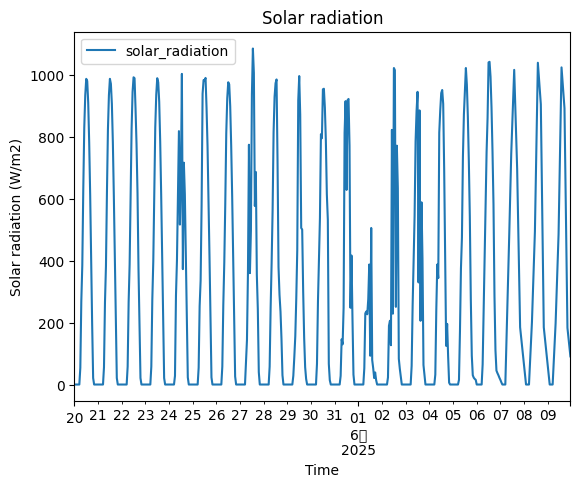

In [50]:
df_solar.set_index('time', inplace=True)
df_solar.plot(kind='line', title='Solar radiation', xlabel='Time', ylabel='Solar radiation (W/m2)')

In [51]:
efficiency = 0.20
area = 2
num_panels = 600
total_area = num_panels * area
print(total_area, 'm2')

1200 m2


In [52]:
df_solar['pv'] = df_solar['solar_radiation'] * efficiency * total_area / 1000
df_solar

,solar_radiation,pv
time,,
2025-05-20 00:00:00,0.0,0.00
2025-05-20 01:00:00,0.0,0.00
2025-05-20 02:00:00,0.0,0.00
2025-05-20 03:00:00,0.0,0.00
2025-05-20 04:00:00,0.0,0.00
...,...,...
2025-06-09 19:00:00,420.0,100.80
2025-06-09 20:00:00,183.0,43.92
2025-06-09 21:00:00,152.0,36.48


<Axes: title={'center': 'Solar Farm Power'}, xlabel='Time', ylabel='Solar radiation (W/m2)'>

C:\Users\gehou\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\gehou\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


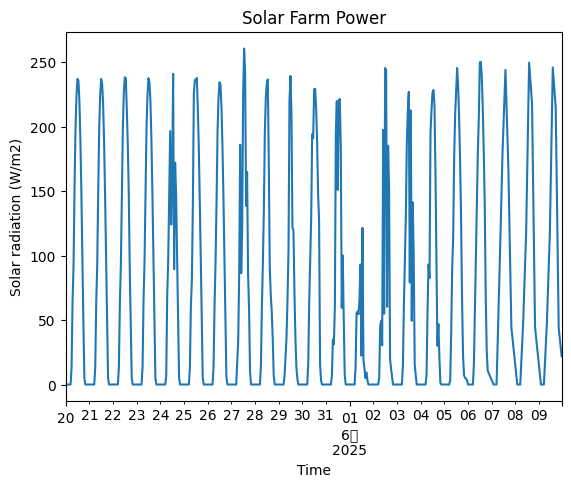

In [53]:
df_solar['pv'].plot(kind='line', title='Solar Farm Power', xlabel='Time', ylabel='Solar radiation (W/m2)')

In [54]:
# spain 42.59811552995308,-5.571933829892936

In [55]:
url = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline' + \
  '/42.59811552995308,-5.571933829892936/2025-05-20/2025-06-9?unitGroup=metric&elements=datetimeEpoch,solarradiation' + \
  '&key=298LYYNTAZVEU5JN67C8W5AQE&contentType=json'

In [56]:
response = urllib.request.urlopen(url).read()

In [57]:
data = json.loads(response)
print(json.dumps(data, indent=2))

{
  "queryCost": 385,
  "latitude": 42.59811552995308,
  "longitude": -5.571933829892936,
  "resolvedAddress": "42.59811552995308,-5.571933829892936",
  "address": "42.59811552995308,-5.571933829892936",
  "timezone": "Europe/Madrid",
  "tzoffset": 2.0,
  "days": [
    {
      "datetimeEpoch": 1747692000,
      "solarradiation": 261.0,
      "hours": [
        {
          "datetimeEpoch": 1747692000,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1747695600,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1747699200,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1747702800,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1747706400,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1747710000,
          "solarradiation": 0.0
        },
        {
          "datetimeEpoch": 1747713600,
          "solarradiation": 0.0
        },
 

In [58]:
from datetime import datetime
lists = []
for day in data['days']:
    for hour_data in day['hours']:
        time = datetime.fromtimestamp(hour_data['datetimeEpoch'])
        solar_radiation = [time, hour_data['solarradiation']]
        lists.append(solar_radiation)

In [59]:
lists

[[datetime.datetime(2025, 5, 19, 15, 0), 0.0],
 [datetime.datetime(2025, 5, 19, 16, 0), 0.0],
 [datetime.datetime(2025, 5, 19, 17, 0), 0.0],
 [datetime.datetime(2025, 5, 19, 18, 0), 0.0],
 [datetime.datetime(2025, 5, 19, 19, 0), 0.0],
 [datetime.datetime(2025, 5, 19, 20, 0), 0.0],
 [datetime.datetime(2025, 5, 19, 21, 0), 0.0],
 [datetime.datetime(2025, 5, 19, 22, 0), 0.0],
 [datetime.datetime(2025, 5, 19, 23, 0), 43.8],
 [datetime.datetime(2025, 5, 20, 0, 0), 198.0],
 [datetime.datetime(2025, 5, 20, 1, 0), 347.7],
 [datetime.datetime(2025, 5, 20, 2, 0), 536.4],
 [datetime.datetime(2025, 5, 20, 3, 0), 602.0],
 [datetime.datetime(2025, 5, 20, 4, 0), 703.4],
 [datetime.datetime(2025, 5, 20, 5, 0), 753.4],
 [datetime.datetime(2025, 5, 20, 6, 0), 644.7],
 [datetime.datetime(2025, 5, 20, 7, 0), 574.0],
 [datetime.datetime(2025, 5, 20, 8, 0), 534.0],
 [datetime.datetime(2025, 5, 20, 9, 0), 532.9],
 [datetime.datetime(2025, 5, 20, 10, 0), 404.1],
 [datetime.datetime(2025, 5, 20, 11, 0), 271.9]

In [60]:
sdf_solar = pd.DataFrame(lists, columns=['time', 'solar_radiation'])
sdf_solar

,time,solar_radiation
0,2025-05-19 15:00:00,0.0
1,2025-05-19 16:00:00,0.0
2,2025-05-19 17:00:00,0.0
3,2025-05-19 18:00:00,0.0
4,2025-05-19 19:00:00,0.0
...,...,...
499,2025-06-09 10:00:00,553.0
500,2025-06-09 11:00:00,369.0
501,2025-06-09 12:00:00,184.0
502,2025-06-09 13:00:00,34.0


<Axes: title={'center': 'Solar radiation'}, xlabel='Time', ylabel='Solar radiation (W/m2)'>

C:\Users\gehou\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\gehou\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


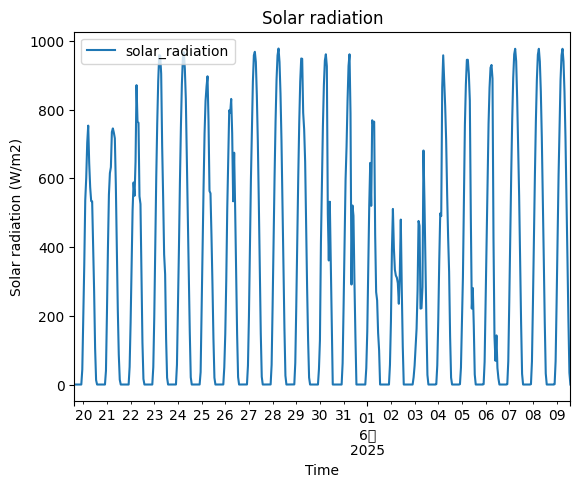

In [61]:
sdf_solar.set_index('time', inplace=True)
sdf_solar.plot(kind='line', title='Solar radiation', xlabel='Time', ylabel='Solar radiation (W/m2)')

In [62]:
sdf_solar['pv'] = sdf_solar['solar_radiation'] * efficiency * total_area / 1000
sdf_solar

,solar_radiation,pv
time,,
2025-05-19 15:00:00,0.0,0.00
2025-05-19 16:00:00,0.0,0.00
2025-05-19 17:00:00,0.0,0.00
2025-05-19 18:00:00,0.0,0.00
2025-05-19 19:00:00,0.0,0.00
...,...,...
2025-06-09 10:00:00,553.0,132.72
2025-06-09 11:00:00,369.0,88.56
2025-06-09 12:00:00,184.0,44.16


<Axes: title={'center': 'Solar Farm Power'}, xlabel='Time', ylabel='Solar radiation (W/m2)'>

C:\Users\gehou\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\gehou\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


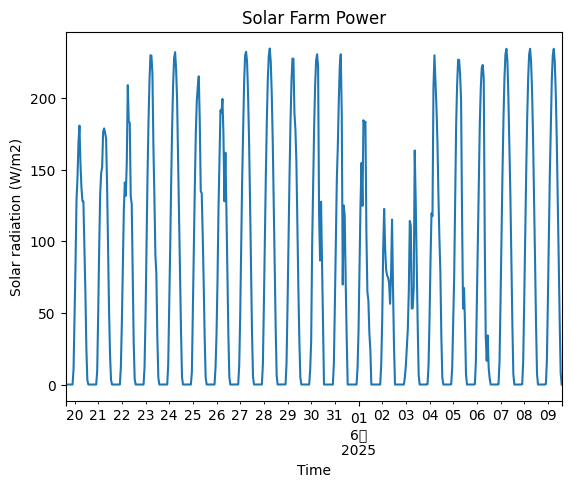

In [63]:
sdf_solar['pv'].plot(kind='line', title='Solar Farm Power', xlabel='Time', ylabel='Solar radiation (W/m2)')

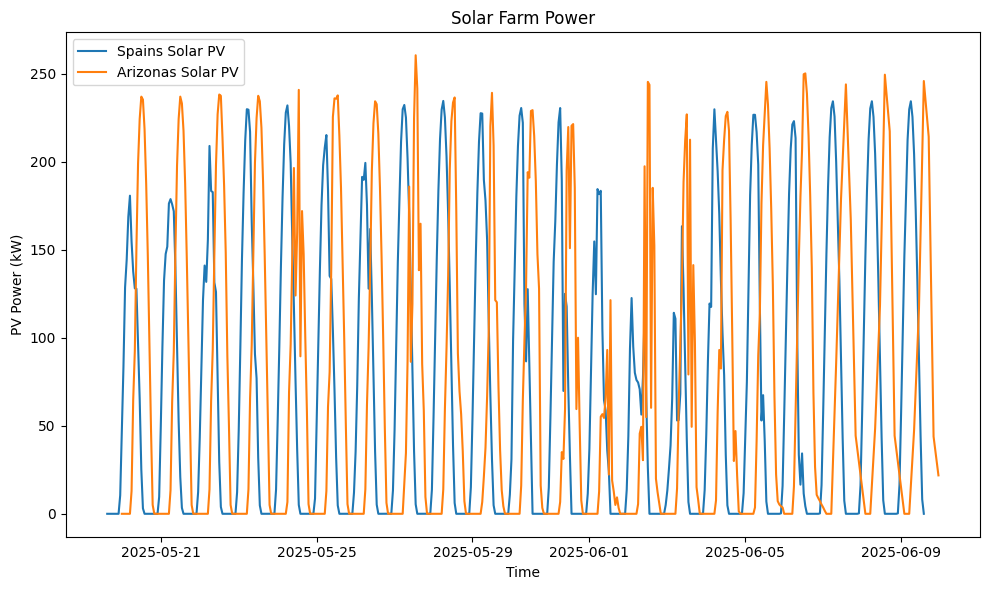

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(sdf_solar['pv'], label='Spains Solar PV')
plt.plot(df_solar['pv'], label='Arizonas Solar PV')

plt.title('Solar Farm Power')
plt.xlabel('Time')
plt.ylabel('PV Power (kW)')
plt.legend()
plt.tight_layout()

plt.show()

In [65]:
print(df_solar.columns)

Index(['solar_radiation', 'pv'], dtype='object')


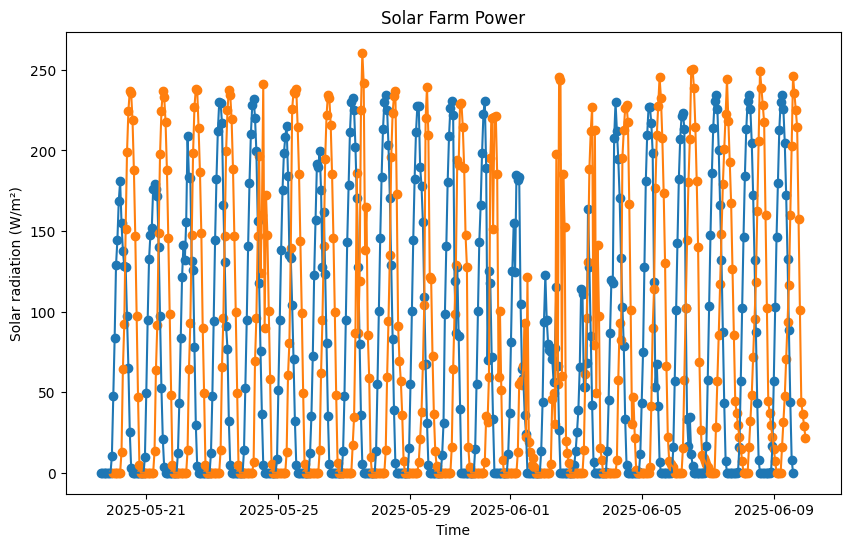

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(sdf_solar.index, sdf_solar['pv'])
plt.scatter(df_solar.index, df_solar['pv'])
plt.plot(sdf_solar['pv'], label='Spains Solar PV')
plt.plot(df_solar['pv'], label='Arizonas Solar PV')
plt.title('Solar Farm Power')
plt.xlabel('Time')
plt.ylabel('Solar radiation (W/m²)')
plt.show()

In [67]:
def simulate_battery_with_load(df, load_kw=500, capacity_kwh=10000, charge_eff=0.95, discharge_eff=0.95):
    battery = 0  # Initial state of charge (kWh)
    soc_list = []  # battery state of charge
    net_power_list = []  # power actually supplied to meet the load
    unmet_list = []  # unmet load when battery can't help

    for _, row in df.iterrows():
        pv = row['pv']  # solar power available this hour (kW)
        net = 0
        unmet = 0

        if pv >= load_kw:
            # Surplus power: use what we need, store excess
            surplus = pv - load_kw
            net = load_kw
            battery += min(surplus * charge_eff, capacity_kwh - battery)
        else:
            # Deficit: try to cover the gap from battery
            deficit = load_kw - pv
            possible_discharge = min(battery, deficit / discharge_eff)
            net = pv + possible_discharge * discharge_eff
            battery -= possible_discharge
            unmet = max(0, load_kw - net)  # if still below load

        soc_list.append(battery)
        net_power_list.append(net)
        unmet_list.append(unmet)

    df['battery_soc'] = soc_list
    df['net_power'] = net_power_list
    df['unmet_load'] = unmet_list
    return df


In [70]:
df_solar = simulate_battery_with_load(df_solar.copy(), load_kw=75)
sdf_solar = simulate_battery_with_load(sdf_solar.copy(), load_kw=75)


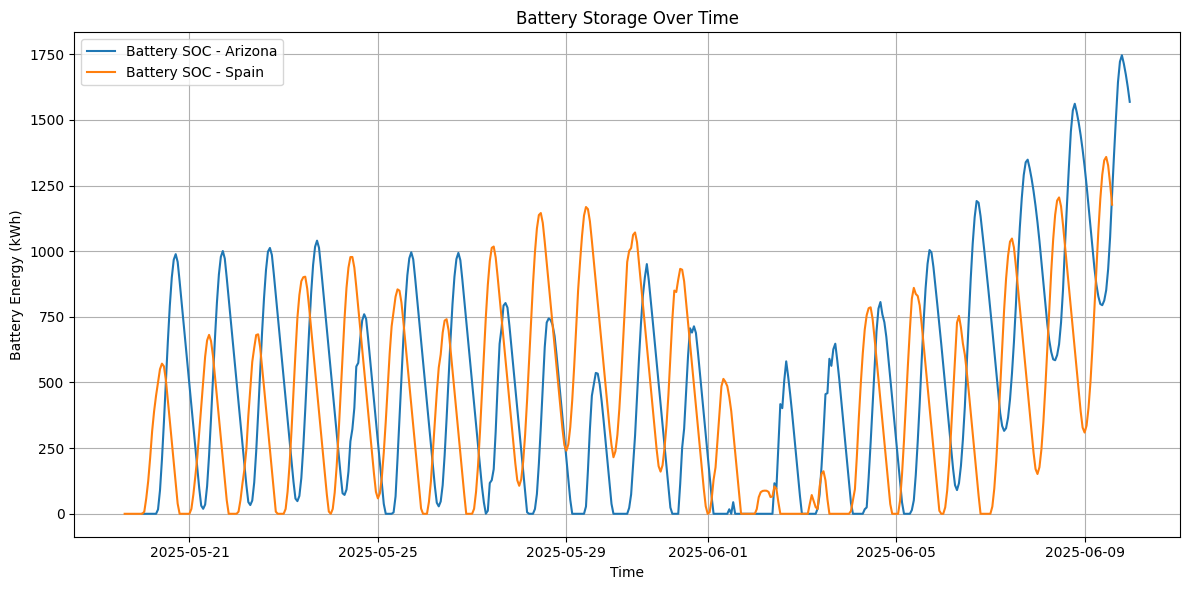

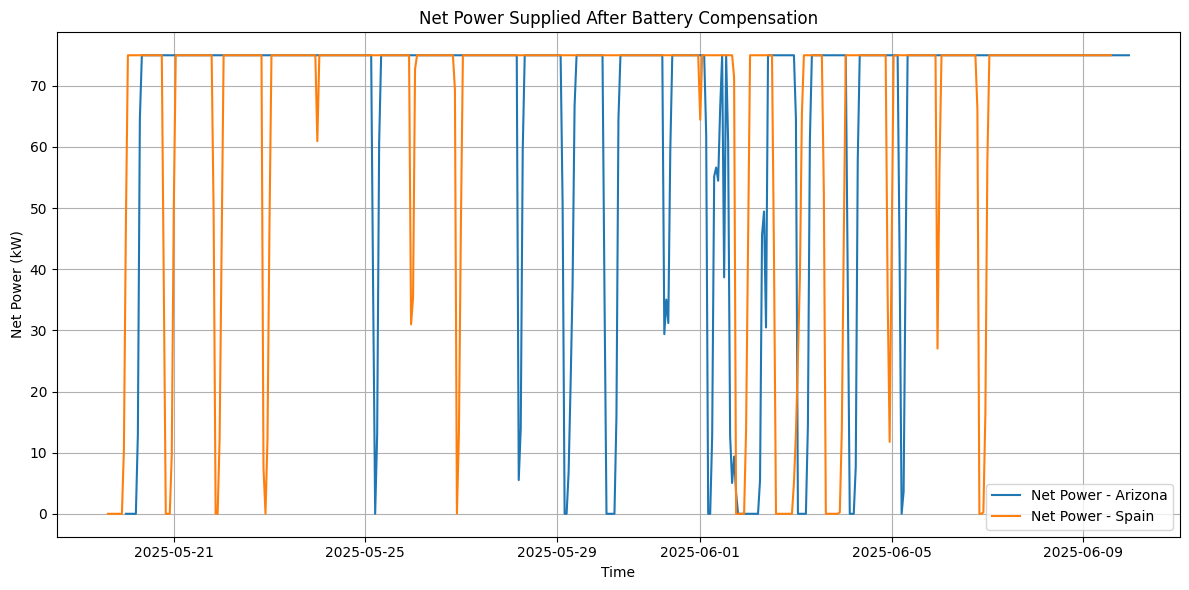

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(df_solar.index, df_solar['battery_soc'], label='Battery SOC - Arizona')
plt.plot(sdf_solar.index, sdf_solar['battery_soc'], label='Battery SOC - Spain')
plt.title('Battery Storage Over Time')
plt.xlabel('Time')
plt.ylabel('Battery Energy (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_solar.index, df_solar['net_power'], label='Net Power - Arizona')
plt.plot(sdf_solar.index, sdf_solar['net_power'], label='Net Power - Spain')
plt.title('Net Power Supplied After Battery Compensation')
plt.xlabel('Time')
plt.ylabel('Net Power (kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
